In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
f='/project/xprecip/merra2_ncfiles/snow/sixhour_resampled/totalsnow_6hrs.nc'
DS_snow6hr=xr.open_dataset(f)
DS_snow6hr

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 61600)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0
Data variables:
    PRECSNO  (time, lat, lon) float32 ...

In [3]:
snow6hr=DS_snow6hr['PRECSNO']
snow6hr

<xarray.DataArray 'PRECSNO' (time: 61600, lat: 66, lon: 120)>
[487872000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0

In [4]:
winter_selected_snow=snow6hr.isel(time=snow6hr.time.dt.season.isin(['DJF']))
winter_selected_snow

<xarray.DataArray 'PRECSNO' (time: 15400, lat: 66, lon: 120)>
[121968000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat      (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.0 51.5 52.0 52.5 53.0

In [5]:
monthly_timeseries=[]
for i in range(1980,2023,1):
    print(i)
    year_of_data = winter_selected_snow.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_50th=year_of_data.quantile(0.50,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_50th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [6]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECSNO' (month: 128, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.98889972e-07, 4.17439151e-06, 3.60570266e-05, ...,
         1.70124695e-05, 3.08782328e-05, 3.59864353e-05],
        [3.57670160e-07, 1.06205116e-05, 2.88530719e-05, ...,
         2.10458875e-05, 3.17897648e-05, 3.20019317e-05],
        [1.27884905e-05, 1.58436596e-05, 3.01812252e-05, ...,
         2.69575976e-05, 3.73383518e-05, 4.92325053e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [0.00000000e+00, 0.00000000e+00, 1.36250630e-04, ...,
         9.29911039e-06, 1.71737356e-05, 2.43233517e-05],
        [0.00000000e+00, 1.56167895e-04, 1.64654106e-04, ...,
         1.32378627e-05, 2.49734730e-05, 3.62512656e-05],
        [1.34183327e-04, 2.49732286e-04, 1.23497099e-04, ...,
         1.34763964e-05, 2.93632038e-05, 3.93858645e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 9.30358851e-07, 1.13029964e-04, ...,
         1.59520132e-05, 2.55170744e-05, 2.93903067e-05],
        [0.00000000e+00, 9.17213038e-05, 1.84315752e-04, ...,
         1.47530809e-05, 2.02242227e-05, 2.35533225e-05],
        [1.19634904e-04, 2.64071859e-04, 1.52399763e-04, ...,
         1.36524905e-05, 1.64946541e-05, 1.77590409e-05]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [7]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'PRECSNO' (month: 42, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.27123246e-19, 5.49053247e-09, 3.42291896e-05, ...,
         6.10850111e-06, 1.42706558e-05, 1.10476631e-05],
        [7.11197797e-14, 1.30822882e-04, 1.70396641e-04, ...,
         1.16989249e-05, 1.47263345e-05, 7.85195152e-06],
        [1.87762082e-04, 2.77725980e-04, 1.73551962e-04, ...,
         1.64539088e-05, 1.54526788e-05, 1.60527125e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [0.00000000e+00, 3.02450189e-08, 4.34005633e-05, ...,
         3.71670467e-06, 4.21143341e-06, 1.26582745e-06],
        [0.00000000e+00, 1.07270665e-04, 1.42614357e-04, ...,
         6.41929728e-06, 7.80462142e-06, 1.15211878e-06],
        [1.51205924e-04, 2.82316207e-04, 1.44238584e-04, ...,
         8.79025902e-06, 6.03799708e-06, 2.14745523e-06]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.47574700e-06, 4.17437768e-05, 1.01993792e-04, ...,
         6.35655738e-06, 6.65898551e-06, 5.37658343e-06],
        [6.58650970e-06, 5.35869622e-05, 6.69556393e-05, ...,
         5.30871603e-06, 9.23733114e-06, 1.26041255e-05],
        [3.46605084e-05, 3.41923442e-05, 4.42978926e-05, ...,
         1.07426313e-05, 1.44878286e-05, 1.37977768e-05]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [20]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_ci_dec=np.zeros((nlats,nlons))
high_ci_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_ci_dec[j,i]=low_slope
        high_ci_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [8]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'PRECSNO' (month: 43, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.98889972e-07, 4.17439151e-06, 3.60570266e-05, ...,
         1.70124695e-05, 3.08782328e-05, 3.59864353e-05],
        [3.57670160e-07, 1.06205116e-05, 2.88530719e-05, ...,
         2.10458875e-05, 3.17897648e-05, 3.20019317e-05],
        [1.27884905e-05, 1.58436596e-05, 3.01812252e-05, ...,
         2.69575976e-05, 3.73383518e-05, 4.92325053e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [0.00000000e+00, 6.70354348e-06, 9.93721187e-05, ...,
         1.74442557e-05, 1.58921466e-05, 9.66165680e-06],
        [1.66595886e-11, 2.52509490e-04, 2.69494951e-04, ...,
         2.19776412e-05, 2.39193905e-05, 1.73902372e-05],
        [2.93754973e-04, 4.89786267e-04, 1.94475520e-04, ...,
         3.07579758e-05, 3.20817344e-05, 1.74862798e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 1.36250630e-04, ...,
         9.29911039e-06, 1.71737356e-05, 2.43233517e-05],
        [0.00000000e+00, 1.56167895e-04, 1.64654106e-04, ...,
         1.32378627e-05, 2.49734730e-05, 3.62512656e-05],
        [1.34183327e-04, 2.49732286e-04, 1.23497099e-04, ...,
         1.34763964e-05, 2.93632038e-05, 3.93858645e-05]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [9]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_jan=np.zeros((nlats,nlons))
low_ci_jan=np.zeros((nlats,nlons))
high_ci_jan=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_jan[j,i]=slope_thiel
        low_ci_jan[j,i]=low_slope
        high_ci_jan[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [11]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'PRECSNO' (month: 43, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 4.17683623e-07, ...,
         6.33777381e-06, 1.01277838e-05, 2.01459625e-05],
        [3.57851699e-28, 1.80722418e-06, 1.31980632e-05, ...,
         1.02310441e-05, 2.32490711e-05, 3.01147811e-05],
        [8.68673669e-06, 2.34430190e-05, 3.62414867e-05, ...,
         2.14562751e-05, 2.85765855e-05, 3.43165593e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [5.65978698e-05, 2.33452767e-04, 3.02800909e-04, ...,
         1.80892821e-05, 1.57021568e-05, 1.37494935e-05],
        [1.85150420e-05, 2.85538845e-04, 3.04866582e-04, ...,
         1.64356316e-05, 1.92632433e-05, 1.25900842e-05],
        [2.24941257e-04, 2.90137876e-04, 1.45578590e-04, ...,
         1.86990947e-05, 1.77894399e-05, 1.55838206e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 9.30358851e-07, 1.13029964e-04, ...,
         1.59520132e-05, 2.55170744e-05, 2.93903067e-05],
        [0.00000000e+00, 9.17213038e-05, 1.84315752e-04, ...,
         1.47530809e-05, 2.02242227e-05, 2.35533225e-05],
        [1.19634904e-04, 2.64071859e-04, 1.52399763e-04, ...,
         1.36524905e-05, 1.64946541e-05, 1.77590409e-05]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [27]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_ci_feb=np.zeros((nlats,nlons))
high_ci_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_ci_feb[j,i]=low_slope
        high_ci_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [10]:
values_med=winter_selected_snow.groupby('time.month').quantile(0.50,dim='time')
values_med

<xarray.DataArray 'PRECSNO' (month: 3, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [7.91745142e-13, 2.92902584e-07, 6.41326733e-05, ...,
         1.18997996e-05, 1.89623097e-05, 2.18469650e-05],
        [1.32014399e-11, 1.02080405e-04, 1.36456918e-04, ...,
         1.29750697e-05, 2.16512999e-05, 2.61222012e-05],
        [1.46167353e-04, 2.44300812e-04, 1.31479930e-04, ...,
         1.87195837e-05, 2.62483954e-05, 3.13082710e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [3.01414449e-12, 2.79186622e-07, 3.64722218e-05, ...,
         1.07581727e-05, 1.58846387e-05, 1.81569849e-05],
        [7.22119760e-12, 5.19175082e-05, 7.70019833e-05, ...,
         1.14537543e-05, 1.63000077e-05, 1.76808917e-05],
        [7.55367801e-05, 1.26289844e-04, 8.04767478e-05, ...,
         1.49791595e-05, 1.74640445e-05, 1.91393774e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [5.37497158e-10, 3.88341141e-06, 8.53846723e-05, ...,
         6.30238355e-06, 1.19117904e-05, 1.18044263e-05],
        [7.55763702e-10, 1.32846646e-04, 1.61416567e-04, ...,
         7.56609825e-06, 1.47498213e-05, 1.46396924e-05],
        [1.70034356e-04, 2.56121159e-04, 1.33512716e-04, ...,
         1.52731964e-05, 1.91993895e-05, 2.02335914e-05]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
  * month     (month) int64 1 2 12

In [14]:
dec_ts_values_med=values_med.sel(month=12)
dec_ts_values_med

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.37497158e-10, 3.88341141e-06, 8.53846723e-05, ...,
        6.30238355e-06, 1.19117904e-05, 1.18044263e-05],
       [7.55763702e-10, 1.32846646e-04, 1.61416567e-04, ...,
        7.56609825e-06, 1.47498213e-05, 1.46396924e-05],
       [1.70034356e-04, 2.56121159e-04, 1.33512716e-04, ...,
        1.52731964e-05, 1.91993895e-05, 2.02335914e-05]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 12

In [11]:
jan_ts_values_med=values_med.sel(month=1)
jan_ts_values_med

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.91745142e-13, 2.92902584e-07, 6.41326733e-05, ...,
        1.18997996e-05, 1.89623097e-05, 2.18469650e-05],
       [1.32014399e-11, 1.02080405e-04, 1.36456918e-04, ...,
        1.29750697e-05, 2.16512999e-05, 2.61222012e-05],
       [1.46167353e-04, 2.44300812e-04, 1.31479930e-04, ...,
        1.87195837e-05, 2.62483954e-05, 3.13082710e-05]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 1

In [16]:
feb_ts_values_med=values_med.sel(month=2)
feb_ts_values_med

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.01414449e-12, 2.79186622e-07, 3.64722218e-05, ...,
        1.07581727e-05, 1.58846387e-05, 1.81569849e-05],
       [7.22119760e-12, 5.19175082e-05, 7.70019833e-05, ...,
        1.14537543e-05, 1.63000077e-05, 1.76808917e-05],
       [7.55367801e-05, 1.26289844e-04, 8.04767478e-05, ...,
        1.49791595e-05, 1.74640445e-05, 1.91393774e-05]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 2

In [17]:
ratio_median_dec=(m_array_dec/dec_ts_values_med)*100*42
ratio_median_dec

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in true_divide
  result_data = func(*input_data)


<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [  0.        ,   2.0206829 ,  78.66289226, ..., -34.7411831 ,
        -70.37096309, -70.89073329],
       [  0.        ,  47.0565481 ,  51.59135997, ..., -62.05945946,
        -69.11734474, -36.64083511],
       [ 38.25648946,  34.09875877,  42.71642051, ..., -27.0655855 ,
        -35.80280997, -40.95517755]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 12

In [25]:
print(np.nanmin(ratio_median_dec))

-798.4780175419622


In [12]:
ratio_median_jan=(m_array_jan/jan_ts_values_med)*100*43
ratio_median_jan

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in true_divide
  result_data = func(*input_data)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in true_divide
  result_data = func(*input_data)


<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 0.00000000e+00, -2.59825725e-11,  7.74474266e+00, ...,
        -1.24340108e+01, -1.89461604e+01, -7.11637640e+00],
       [ 0.00000000e+00,  1.39047264e+01,  2.29118670e+01, ...,
        -6.59571408e+00, -2.37378078e+00, -4.71846757e+00],
       [ 7.40728909e+00,  1.54171882e+01,  6.73689338e+00, ...,
        -2.43846092e+01, -3.27023674e+00, -2.16079025e+00]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 1

In [19]:
ratio_median_feb=(m_array_feb/feb_ts_values_med)*100*43
ratio_median_feb

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 0.00000000e+00,  3.39382517e-03,  8.07816713e+00, ...,
        -1.15325988e+01, -8.67236497e+00, -2.56518856e+01],
       [ 0.00000000e+00, -5.14934020e+00,  1.01597175e+01, ...,
        -2.51664092e+01, -2.59493340e+01, -2.68163438e+01],
       [-1.26601225e+01, -5.75583246e+00, -1.23798623e+01, ...,
        -3.70222722e+01, -2.90311064e+01, -6.16380586e+00]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.5
    month     int64 2

In [22]:
mask_sig_dec=np.where(((low_ci_dec<=0) & (high_ci_dec<=0))|((low_ci_dec>=0) & (high_ci_dec>=0)),ratio_median_dec,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_dec

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

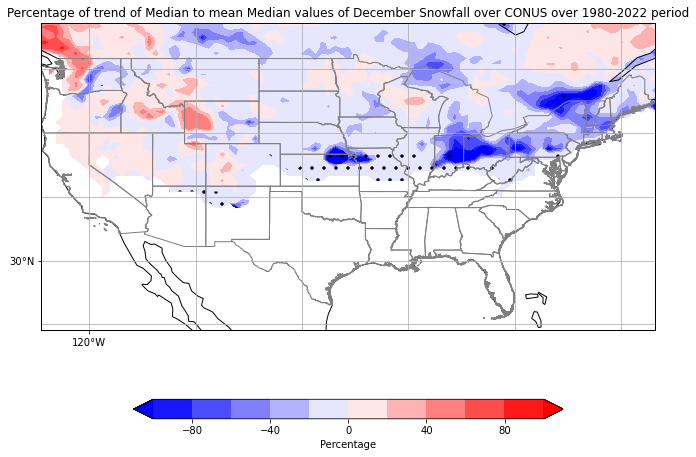

In [23]:
fig = plt.figure(figsize=(11,8.5))
max_val=100
increment=20
clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_median_dec[:,:]
data,lon=add_cyclic_point(data,coord=ratio_median_dec['lon'])
mask_data,lons=add_cyclic_point(mask_sig_dec,coord=ratio_median_dec['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ratio_median_dec['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,ratio_median_dec['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)

# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('Percentage of trend of Median to mean Median values of December Snowfall over CONUS over 1980-2022 period')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/decmedian_snow_trendcomparison_withsig.png')

In [13]:
mask_sig_jan=np.where(((low_ci_jan<=0) & (high_ci_jan<=0))|((low_ci_jan>=0) & (high_ci_jan>=0)),ratio_median_jan,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_jan

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0., nan, nan, ..., nan, nan, nan],
       [ 0., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

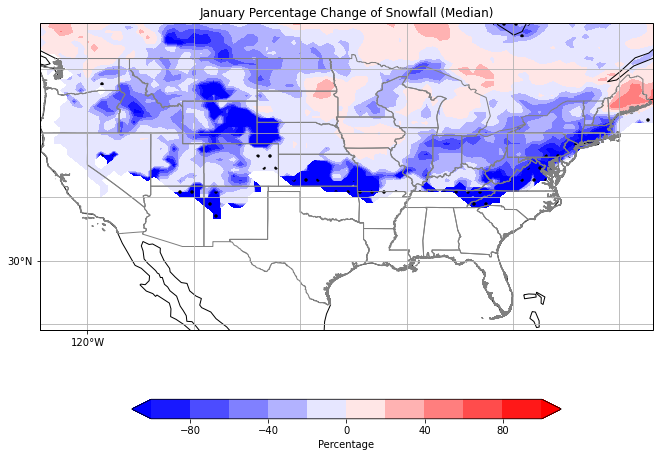

In [14]:
fig = plt.figure(figsize=(11,8.5))
max_val=100.0
increment=20

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_median_jan[:,:]
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
mask_data,lons=add_cyclic_point(mask_sig_jan,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('January Percentage Change of Snowfall (Median)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/janmedian_snow_trendcomparison_withsig.png')

In [28]:
mask_sig_feb=np.where(((low_ci_feb<=0) & (high_ci_feb<=0))|((low_ci_feb>=0) & (high_ci_feb>=0)),ratio_median_feb,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_feb

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0., nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

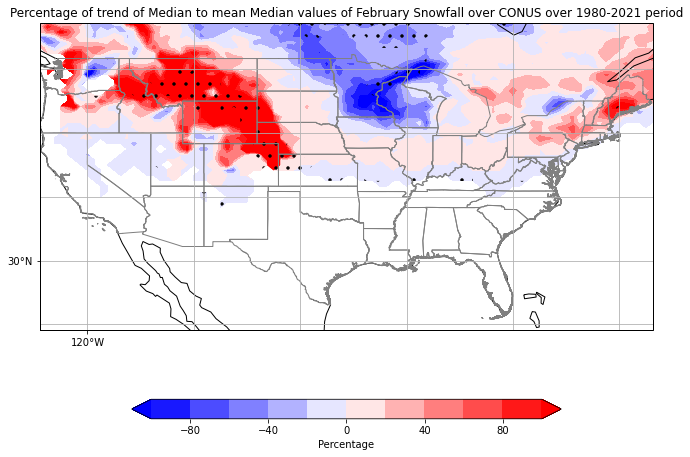

In [29]:
fig = plt.figure(figsize=(11,8.5))
max_val=100
increment=20

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_median_feb[:,:]
data,lon=add_cyclic_point(data,coord=ratio_median_feb['lon'])
mask_data,lons=add_cyclic_point(mask_sig_feb,coord=feb_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ratio_median_feb['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,feb_ts['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('Percentage of trend of Median to mean Median values of February Snowfall over CONUS over 1980-2021 period')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/febmedian_snow_trendcomparison_withsig.png')

### 95th Percentile Snowfall percentage changes

In [15]:
monthly_timeseries=[]
for i in range(1980,2023,1):
    print(i)
    year_of_data = winter_selected_snow.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_95th=year_of_data.quantile(0.95,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_95th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [16]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECSNO' (month: 128, lat: 66, lon: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00094525, 0.00302542, 0.00276964, ..., 0.00135747,
         0.00106909, 0.00103923],
        [0.00318449, 0.0030716 , 0.00273818, ..., 0.00131478,
         0.00123911, 0.00138987],
        [0.00360658, 0.00330272, 0.00157339, ..., 0.00155365,
         0.00119568, 0.00107104]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00103292, 0.00194007, 0.00234897, ..., 0.00232028,
         0.00230287, 0.002518  ],
        [0.00130773, 0.00272876, 0.00210255, ..., 0.0025933 ,
         0.00222622, 0.00230104],
        [0.00289441, 0.00291976, 0.00115706, ..., 0.00217157,
         0.00217267, 0.00232435]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00026753, 0.00137195, 0.00174903, ..., 0.0008625 ,
         0.00103253, 0.00123561],
        [0.00086966, 0.00212554, 0.00225067, ..., 0.00122376,
         0.00107767, 0.00109065],
        [0.00236188, 0.00290748, 0.00077818, ..., 0.00088457,
         0.00084121, 0.00091118]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [32]:
dec_ts_95th=monthly_ts.sel(month=12)
dec_ts_95th

<xarray.DataArray 'PRECSNO' (month: 42, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.77831762e-04, 8.08095932e-04, 2.66595483e-03, ...,
         9.37166810e-04, 9.31751356e-04, 9.28282179e-04],
        [6.65369630e-04, 3.19033861e-03, 2.98606157e-03, ...,
         9.64754075e-04, 7.96470791e-04, 7.23856688e-04],
        [2.71255374e-03, 4.36952114e-03, 1.53854787e-03, ...,
         8.05881247e-04, 7.66475499e-04, 7.30788815e-04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [2.39792978e-05, 2.61554495e-04, 2.05068588e-03, ...,
         2.00950073e-03, 1.74176842e-03, 1.47242062e-03],
        [4.83417511e-04, 2.42716372e-03, 2.84408927e-03, ...,
         1.48139217e-03, 1.37047470e-03, 1.24678016e-03],
        [3.12587023e-03, 3.57380509e-03, 1.66813582e-03, ...,
         1.56511292e-03, 1.29260756e-03, 1.24274343e-03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.07780402e-03, 2.36798227e-03, 2.36970782e-03, ...,
         8.17476958e-04, 8.14251229e-04, 8.31733260e-04],
        [1.53341293e-03, 2.49950886e-03, 2.30504274e-03, ...,
         1.14820376e-03, 8.25537607e-04, 8.56717420e-04],
        [1.72424912e-03, 1.88632309e-03, 1.53903067e-03, ...,
         1.28265678e-03, 9.30846640e-04, 6.89023695e-04]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [33]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(dec_ts_95th['lon'])
nlats=len(dec_ts_95th['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec_95th=np.zeros((nlats,nlons))
low_ci_dec95=np.zeros((nlats,nlons))
high_ci_dec95=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts_95th[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec_95th[j,i]=slope_thiel
        low_ci_dec95[j,i]=low_slope
        high_ci_dec95[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [17]:
jan_ts_95th=monthly_ts.sel(month=1)
jan_ts_95th

<xarray.DataArray 'PRECSNO' (month: 43, lat: 66, lon: 120)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [9.45247710e-04, 3.02541852e-03, 2.76964307e-03, ...,
         1.35746747e-03, 1.06908530e-03, 1.03923231e-03],
        [3.18448916e-03, 3.07159722e-03, 2.73818374e-03, ...,
         1.31478390e-03, 1.23910755e-03, 1.38987005e-03],
        [3.60657573e-03, 3.30272317e-03, 1.57339275e-03, ...,
         1.55365318e-03, 1.19568110e-03, 1.07104164e-03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [2.69130711e-04, 1.14487298e-03, 1.64103359e-03, ...,
         1.44964755e-03, 1.07151642e-03, 7.13974983e-04],
        [9.81070381e-04, 2.37180889e-03, 2.38932967e-03, ...,
         1.27167720e-03, 8.53204727e-04, 6.10913103e-04],
        [2.82062888e-03, 3.94867063e-03, 1.43088102e-03, ...,
         1.15796179e-03, 6.11479580e-04, 3.94910946e-04]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.03291869e-03, 1.94007158e-03, 2.34897137e-03, ...,
         2.32028067e-03, 2.30287462e-03, 2.51800444e-03],
        [1.30772889e-03, 2.72875726e-03, 2.10255086e-03, ...,
         2.59330273e-03, 2.22622082e-03, 2.30104385e-03],
        [2.89440677e-03, 2.91976333e-03, 1.15706250e-03, ...,
         2.17156559e-03, 2.17267349e-03, 2.32434869e-03]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [18]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(jan_ts_95th['lon'])
nlats=len(jan_ts_95th['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_jan_95th=np.zeros((nlats,nlons))
low_ci_jan95=np.zeros((nlats,nlons))
high_ci_jan95=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts_95th[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_jan_95th[j,i]=slope_thiel
        low_ci_jan95[j,i]=low_slope
        high_ci_jan95[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [36]:
feb_ts_95th=monthly_ts.sel(month=2)
feb_ts_95th

<xarray.DataArray 'PRECSNO' (month: 43, lat: 66, lon: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00012145, 0.00061411, 0.00070061, ..., 0.00074917,
         0.00053016, 0.00049986],
        [0.00052489, 0.00102664, 0.00092173, ..., 0.0008136 ,
         0.00065221, 0.00053549],
        [0.00147237, 0.00161467, 0.00053526, ..., 0.00080757,
         0.00068888, 0.00057596]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00103351, 0.00363805, 0.00328878, ..., 0.0010635 ,
         0.00102   , 0.00091768],
        [0.00286524, 0.00374725, 0.00283852, ..., 0.00115044,
         0.00097162, 0.00070978],
        [0.00366442, 0.00308977, 0.00137422, ..., 0.0005515 ,
         0.00049677, 0.0006308 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00026753, 0.00137195, 0.00174903, ..., 0.0008625 ,
         0.00103253, 0.00123561],
        [0.00086966, 0.00212554, 0.00225067, ..., 0.00122376,
         0.00107767, 0.00109065],
        [0.00236188, 0.00290748, 0.00077818, ..., 0.00088457,
         0.00084121, 0.00091118]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [37]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(feb_ts_95th['lon'])
nlats=len(feb_ts_95th['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb_95th=np.zeros((nlats,nlons))
low_ci_feb95=np.zeros((nlats,nlons))
high_ci_feb95=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts_95th[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb_95th[j,i]=slope_thiel
        low_ci_feb95[j,i]=low_slope
        high_ci_feb95[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [19]:
values_95th=winter_selected_snow.groupby('time.month').quantile(0.95,dim='time')
values_95th

<xarray.DataArray 'PRECSNO' (month: 3, lat: 66, lon: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00054605, 0.00203647, 0.00227187, ..., 0.00126191,
         0.00111207, 0.00111764],
        [0.0015101 , 0.00278534, 0.00256563, ..., 0.00116908,
         0.00110943, 0.00104264],
        [0.00287057, 0.0034502 , 0.00146194, ..., 0.00103647,
         0.00099475, 0.00098637]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00046666, 0.00170427, 0.00189126, ..., 0.00109573,
         0.00102579, 0.0010501 ],
        [0.00136359, 0.00234707, 0.00215842, ..., 0.00107409,
         0.000989  , 0.00098739],
        [0.00256736, 0.00290881, 0.00115598, ..., 0.00098623,
         0.00097391, 0.0009775 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00048755, 0.00185689, 0.00218282, ..., 0.00110913,
         0.00107952, 0.00106257],
        [0.00139873, 0.00259913, 0.0024552 , ..., 0.00115387,
         0.00101824, 0.00100072],
        [0.00277364, 0.00330098, 0.00130569, ..., 0.00106342,
         0.00102104, 0.00101546]]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
  * month     (month) int64 1 2 12

In [39]:
dec_ts_values_95=values_95th.sel(month=12)
dec_ts_values_95

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00048755, 0.00185689, 0.00218282, ..., 0.00110913, 0.00107952,
        0.00106257],
       [0.00139873, 0.00259913, 0.0024552 , ..., 0.00115387, 0.00101824,
        0.00100072],
       [0.00277364, 0.00330098, 0.00130569, ..., 0.00106342, 0.00102104,
        0.00101546]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 12

In [20]:
jan_ts_values_95=values_95th.sel(month=1)
jan_ts_values_95

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00054605, 0.00203647, 0.00227187, ..., 0.00126191, 0.00111207,
        0.00111764],
       [0.0015101 , 0.00278534, 0.00256563, ..., 0.00116908, 0.00110943,
        0.00104264],
       [0.00287057, 0.0034502 , 0.00146194, ..., 0.00103647, 0.00099475,
        0.00098637]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 1

In [41]:
feb_ts_values_95=values_95th.sel(month=2)
feb_ts_values_95

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00046666, 0.00170427, 0.00189126, ..., 0.00109573, 0.00102579,
        0.0010501 ],
       [0.00136359, 0.00234707, 0.00215842, ..., 0.00107409, 0.000989  ,
        0.00098739],
       [0.00256736, 0.00290881, 0.00115598, ..., 0.00098623, 0.00097391,
        0.0009775 ]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 2

In [42]:
ratio_95th_dec=(m_array_dec_95th/dec_ts_values_95)*100*42
ratio_95th_dec

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in true_divide
  result_data = func(*input_data)


<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-9.04538138e+00, -8.38743325e+00,  1.79086758e-01, ...,
        -6.18435338e+00, -5.81477631e+00, -1.16901330e+01],
       [-2.97917278e+00, -6.03135800e+00,  2.87632732e+00, ...,
        -2.38627154e+01, -2.03989186e+01, -7.81556923e+00],
       [ 1.86859741e-03, -7.19237962e+00,  1.02527173e+01, ...,
        -7.20384324e-01, -3.30789343e+00, -8.08318160e+00]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 12

In [21]:
ratio_95th_jan=(m_array_jan_95th/jan_ts_values_95)*100*43
ratio_95th_jan

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in true_divide
  result_data = func(*input_data)


<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [-10.76324148, -15.73076063,  -6.91596832, ...,   2.51387132,
          1.23425138,   0.08862358],
       [ -9.15800615, -15.35422897, -11.6676496 , ...,   4.55399237,
         -3.35427572,  -2.28789345],
       [-17.69349608, -13.46927224,  -7.36982819, ...,   5.9697494 ,
         -5.81424755,  -7.17500592]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 1

In [44]:
ratio_95th_feb=(m_array_feb_95th/feb_ts_values_95)*100*43
ratio_95th_feb

<xarray.DataArray 'PRECSNO' (lat: 66, lon: 120)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [  0.47713588,  14.84390013,  11.89166568, ...,   2.40758765,
         -5.56863099,   4.64684683],
       [  9.43891341,   1.93830132,   5.48284887, ...,  17.66545148,
          4.30113729,   8.21398697],
       [ -0.86633771, -13.03236923, -17.57976087, ...,   5.9642845 ,
         -0.26316514,  -3.00596223]])
Coordinates:
  * lon       (lon) float64 -128.1 -127.5 -126.9 -126.2 ... -55.0 -54.38 -53.75
  * lat       (lat) float64 20.5 21.0 21.5 22.0 22.5 ... 51.5 52.0 52.5 53.0
    quantile  float64 0.95
    month     int64 2

In [45]:
mask_sig_dec95=np.where(((low_ci_dec95<=0) & (high_ci_dec95<=0))|((low_ci_dec95>=0) & (high_ci_dec95>=0)),ratio_95th_dec,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_dec95

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

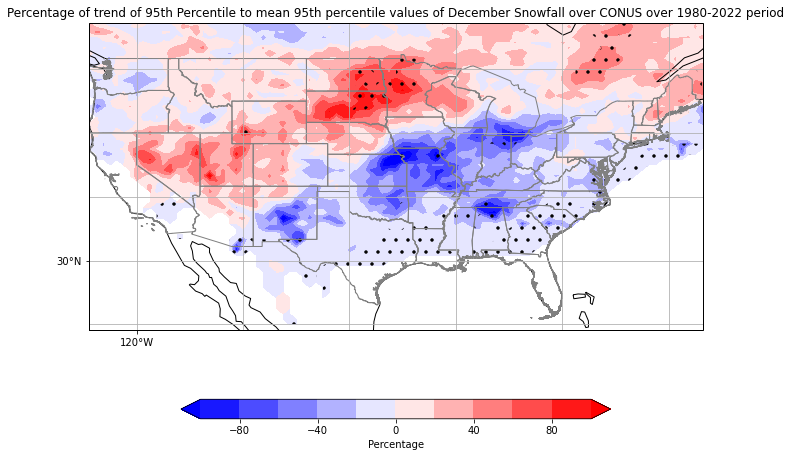

In [46]:
fig = plt.figure(figsize=(11,8.5))
max_val=100.0
increment=20.0

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_95th_dec[:,:]
data,lon=add_cyclic_point(data,coord=ratio_95th_dec['lon'])
mask_data,lons=add_cyclic_point(mask_sig_dec95,coord=ratio_95th_dec['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ratio_95th_dec['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,ratio_95th_dec['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('Percentage of trend of 95th Percentile to mean 95th percentile values of December Snowfall over CONUS over 1980-2022 period')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/dec95th_snow_trendcomparison_withsig.png')

In [22]:
mask_sig_jan95=np.where(((low_ci_jan95<=0) & (high_ci_jan95<=0))|((low_ci_jan95>=0) & (high_ci_jan95>=0)),ratio_95th_jan,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_jan95

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

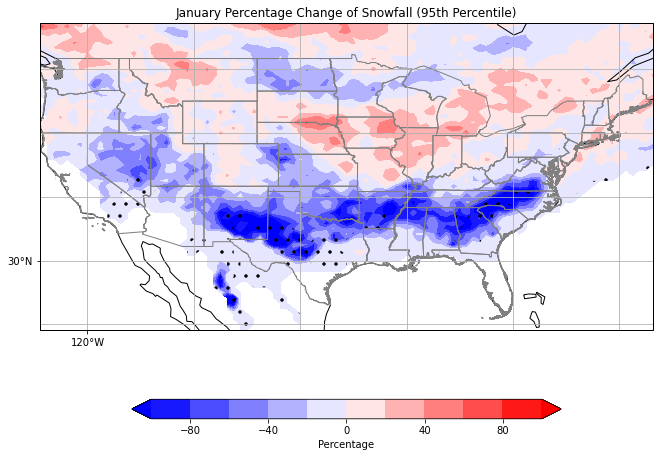

In [23]:
fig = plt.figure(figsize=(11,8.5))
max_val=100.0
increment=20.0

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_95th_jan[:,:]
data,lon=add_cyclic_point(data,coord=ratio_95th_jan['lon'])
mask_data,lons=add_cyclic_point(mask_sig_jan95,coord=ratio_95th_jan['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ratio_95th_jan['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('January Percentage Change of Snowfall (95th Percentile)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/jan95th_snow_trendcomparison_withsig.png')

In [49]:
mask_sig_feb95=np.where(((low_ci_feb95<=0) & (high_ci_feb95<=0))|((low_ci_feb95>=0) & (high_ci_feb95>=0)),ratio_95th_feb,np.nan) #if CI includes 0, then not significant. If CI doesn't then significant.
mask_sig_feb95

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

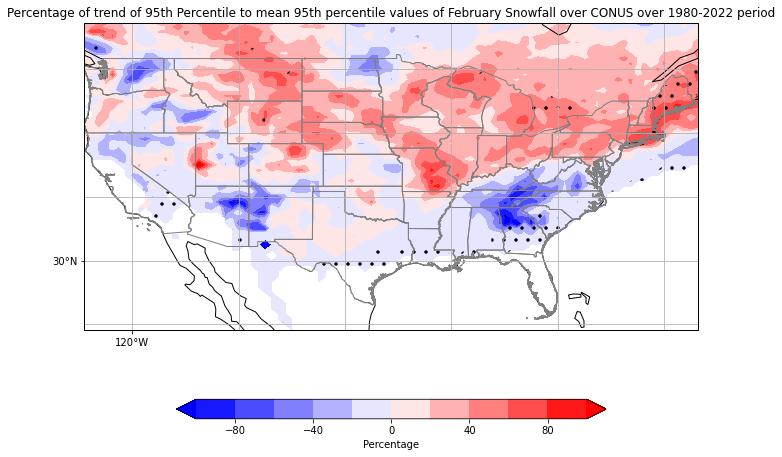

In [50]:
fig = plt.figure(figsize=(11,8.5))
max_val=100.0
increment=20

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=ratio_95th_feb[:,:]
data,lon=add_cyclic_point(data,coord=ratio_95th_feb['lon'])
mask_data,lons=add_cyclic_point(mask_sig_feb95,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ratio_95th_feb['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
            transform = ccrs.PlateCarree(),colors='None',
            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Percentage')

# Add title
plt.title('Percentage of trend of 95th Percentile to mean 95th percentile values of February Snowfall over CONUS over 1980-2022 period')
plt.savefig('/homes/areed29/CLIM997/summer22_research/Qualifier_Results/feb95th_snow_trendcomparison_withsig.png')